<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/CNN_koala_or_bear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image, ImageDraw
from IPython.display import HTML
import random

def koala_or_bear(bear=False, rotate=False, resize=False, gray=True, black=True, others=False):
    r = random.randint(100, 255)
    g = random.randint(100, 255)
    b = random.randint(100, 255)
    if gray:
        r = g = b

    im = Image.new('RGB', (500, 500), (r, g, b))
    draw = ImageDraw.Draw(im)

    if others:
        for i in range(20):
            r = random.randint(100, 255)
            g = random.randint(100, 255)
            b = random.randint(100, 255)
            if gray:
                r = g = b

            x1 = random.randint(100, 400)
            y1 = random.randint(100, 400)
            x2 = random.randint(100, 400)
            y2 = random.randint(100, 400)
            draw.ellipse((x1, x2, y1, y2), fill=(r, g, b))

    r = random.randint(0, 200)
    g = random.randint(0, 200)
    b = random.randint(0, 200)
    if black:
        r = g = b = 0

    dx1 = random.randint(-10, 0)
    dx2 = random.randint(0, 10)
    dy1 = random.randint(-10, 0)
    dy2 = random.randint(0, 10)
    if bear:
        draw.ellipse((200 + dx1, 200 + dy1, 300 + dx2, 300 + dy2), fill=(r, g, b))
    else:
        draw.ellipse((210 + dx1, 210 + dy1, 290 + dx2, 290 + dy2), fill=(r, g, b))

    dx1 = random.randint(-5, 10)
    dx2 = random.randint(-10, 5)
    dy1 = random.randint(-5, 10)
    dy2 = random.randint(-10, 5)
    if bear:
        #draw.ellipse((160 + dx1, 160 + dy1, 230 + dx2, 230 + dy2), fill=(r, g, b))
        draw.ellipse((160 + dx1, 180 + dy1, 230 + dx2, 250 + dy2), fill=(r, g, b))
    else:
        #draw.ellipse((160 + dx1, 190 + dy1, 230 + dx2, 260 + dy2), fill=(r, g, b))
        draw.ellipse((160 + dx1, 210 + dy1, 230 + dx2, 280 + dy2), fill=(r, g, b))
    dx1 = random.randint(-5, 10)
    dx2 = random.randint(-10, 5)
    dy1 = random.randint(-5, 10)
    dy2 = random.randint(-10, 5)
    if bear:
        #draw.ellipse((270 + dx1, 160 + dy1, 340 + dx2, 230 + dy2), fill=(r, g, b))
        draw.ellipse((270 + dx1, 180 + dy1, 340 + dx2, 250 + dy2), fill=(r, g, b))
    else:
        #draw.ellipse((270 + dx1, 190 + dy1, 340 + dx2, 260 + dy2), fill=(r, g, b))
        draw.ellipse((270 + dx1, 210 + dy1, 340 + dx2, 280 + dy2), fill=(r, g, b))

    if rotate:
        angle = random.randint(0, 360)
        im = im.rotate(angle)

    if resize:
        h = random.randint(100, 220)
        center = random.randint(220, 280)
        im = im.resize(size=(384,384), resample=Image.LANCZOS, box=(center - h, center - h, center + h, center + h))

    return im

In [0]:
!mkdir koala_or_bear

num_data = 200
for i in range(num_data):
    im = koala_or_bear(bear=False, rotate=True, resize=True, gray=False, black=False, others=True)
    im.save("koala_or_bear/koala_{}.jpg".format(i), quality=95)

for i in range(num_data):
    im = koala_or_bear(bear=True, rotate=True, resize=True, gray=False, black=False, others=True)
    im.save("koala_or_bear/bear_{}.jpg".format(i), quality=95)

In [0]:
from PIL import Image

koalas = []
for i in range(num_data):
    koala = Image.open("koala_or_bear/koala_{}.jpg".format(i))
    koalas.append(koala)

bears = []
for i in range(num_data):
    bear = Image.open("koala_or_bear/bear_{}.jpg".format(i))
    bears.append(bear)

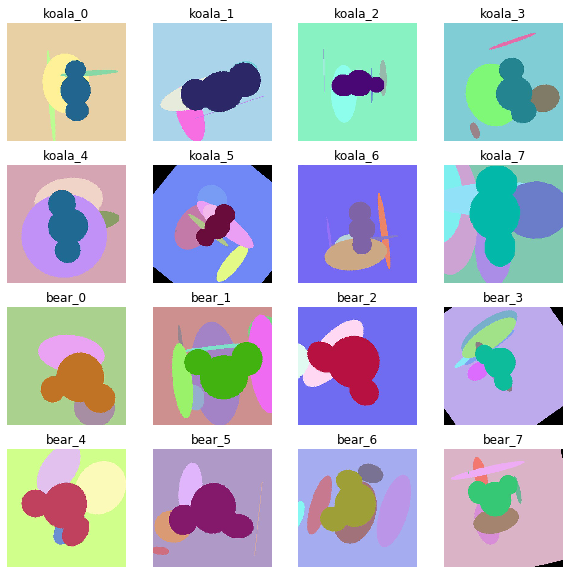

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.axis('off')
    if i < 8:
        ax.set_title('koala_{}'.format(i))
        ax.imshow(koalas[i],cmap=plt.cm.gray, interpolation='none')
    else:
        ax.set_title('bear_{}'.format(i - 8))
        ax.imshow(bears[i - 8],cmap=plt.cm.gray, interpolation='none')
plt.show()

In [0]:
import numpy as np

X = []
Y = []

index = 0
for koala in koalas:
    resize_img = koala.resize((128, 128))
    r, g, b = resize_img.split()
    r_resize_img = np.asarray(np.float32(r)/255.0)
    g_resize_img = np.asarray(np.float32(g)/255.0)
    b_resize_img = np.asarray(np.float32(b)/255.0)
    rgb_resize_img = np.asarray([r_resize_img, g_resize_img, b_resize_img])
    X.append(rgb_resize_img)
    Y.append(0)
    index += 1
    if index >= num_data:
        break

index = 0
for bear in bears:
    resize_img = bear.resize((128, 128))
    r, g, b = resize_img.split()
    r_resize_img = np.asarray(np.float32(r)/255.0)
    g_resize_img = np.asarray(np.float32(g)/255.0)
    b_resize_img = np.asarray(np.float32(b)/255.0)
    rgb_resize_img = np.asarray([r_resize_img, g_resize_img, b_resize_img])
    X.append(rgb_resize_img)
    Y.append(1)
    index += 1
    if index >= num_data:
        break

X = np.array(X, dtype='float32')
Y = np.array(Y, dtype='int64')

In [0]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.1
)

In [0]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

d1, d2, d3, d4 = X_train.shape
X_train_a = X_train.reshape((d1, d2 * d3 * d4))
Y_train_onehot = np.identity(2)[Y_train]
d1, d2, d3, d4 = X_test.shape
X_test_a = X_test.reshape((d1, d2 * d3 * d4))
Y_test_onehot = np.identity(2)[Y_test]

X_train_t = torch.from_numpy(X_train).float()
Y_train_t = torch.from_numpy(Y_train).long()

X_train_v = torch.autograd.Variable(X_train_t)
Y_train_v = torch.autograd.Variable(Y_train_t)

X_test_t = torch.from_numpy(X_test).float()
Y_test_t = torch.from_numpy(Y_test).long()

X_test_v = torch.autograd.Variable(X_test_t)
Y_test_v = torch.autograd.Variable(Y_test_t)

train = TensorDataset(X_train_t, Y_train_t)
train_loader = DataLoader(train, batch_size=32, shuffle=True)

In [0]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(X_train_a, Y_train)
print("Accuracy score (train): ", classifier.score(X_train_a, Y_train))
print("Accuracy score (test): ", classifier.score(X_test_a, Y_test))

Accuracy score (train):  1.0
Accuracy score (test):  0.45
CPU times: user 7min 55s, sys: 57.4 ms, total: 7min 55s
Wall time: 7min 55s


In [0]:
%%time
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(max_iter=10000, early_stopping=True)
classifier.fit(X_train_a, Y_train)
print("Accuracy score (train): ", classifier.score(X_train_a, Y_train))
print("Accuracy score (test): ", classifier.score(X_test_a, Y_test))

Accuracy score (train):  0.5055555555555555
Accuracy score (test):  0.45
CPU times: user 16.9 s, sys: 15 s, total: 31.8 s
Wall time: 9.36 s


In [0]:
%%time
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(max_iter=10000, early_stopping=True,
                           hidden_layer_sizes=(100, 100))
classifier.fit(X_train_a, Y_train)
print("Accuracy score (train): ", classifier.score(X_train_a, Y_train))
print("Accuracy score (test): ", classifier.score(X_test_a, Y_test))

Accuracy score (train):  0.6027777777777777
Accuracy score (test):  0.45
CPU times: user 29.5 s, sys: 26.2 s, total: 55.7 s
Wall time: 16.1 s


In [0]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 10, 5)
        self.conv2 = torch.nn.Conv2d(10, 20, 5)
        self.fc1 = torch.nn.Linear(20 * 29 * 29, 50)
        self.fc2 = torch.nn.Linear(50, 2)
    
    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 20 * 29 * 29)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.log_softmax(self.fc2(x), 1)
        return x

In [0]:
from torchsummary import summary
model = CNN()
summary(model, X[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 10, 124, 124]             760
            Conv2d-2           [-1, 20, 58, 58]           5,020
            Linear-3                   [-1, 50]         841,050
            Linear-4                    [-1, 2]             102
Total params: 846,932
Trainable params: 846,932
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 1.69
Params size (MB): 3.23
Estimated Total Size (MB): 5.11
----------------------------------------------------------------


In [0]:
def learn(model, criterion, optimizer, n_iteration):
    for epoch in range(n_iteration):
        total_loss = np.array(0, dtype='float64')
        for x, y in train_loader:
            x = torch.autograd.Variable(x)
            y = torch.autograd.Variable(y)
            optimizer.zero_grad()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.data.numpy()
        
        if (epoch + 1) % 10 == 0:
            print(epoch + 1, total_loss)
        
        if total_loss == np.array(0, dtype='float64'):
            break
        
        loss_history.append(total_loss)
    
    return model

In [0]:
#%%time
model = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_history = []
model = learn(model, criterion, optimizer, 300)

10 8.319781482219696
20 8.325172007083893
30 8.329379856586456
40 8.320867359638214
50 8.323299944400787
60 8.323043286800385
70 8.335959672927856
80 8.316056370735168
90 8.330509603023529
100 8.32987529039383
110 8.319759905338287
120 8.32045567035675
130 8.315888285636902
140 8.31777536869049
150 8.322733759880066
160 8.320572793483734
170 8.32559061050415
180 8.325724959373474
190 8.322351455688477
200 8.315987765789032
210 8.32013988494873
220 8.323032855987549
230 8.323682010173798
240 8.319460272789001
250 8.316366195678711
260 8.364713549613953
270 8.31410664319992
280 8.322752714157104
290 8.335628032684326
300 8.323219537734985


In [0]:
ax = plt.subplot(2, 1, 1)
ax.plot(loss_history)
ax.grid()
ax = plt.subplot(2, 1, 2)
ax.plot(loss_history)
ax.set_yscale('log')
ax.grid()

In [0]:
Y_pred = torch.max(model(X_train_v).data, 1)[1]
accuracy = sum(Y_train == Y_pred.numpy()) / len(Y_train)
print(accuracy)

In [0]:
Y_pred = torch.max(model(X_test_v).data, 1)[1]
accuracy = sum(Y_test == Y_pred.numpy()) / len(Y_test)
print(accuracy)